<a href="https://colab.research.google.com/github/N-OmyGod/Android/blob/dev/KerasC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from numpy import asarray

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

Загружаем тренировочный и тестовый наборы данных


/usr/local/lib/python3.7/dist-packages/keras/utils/image_utils.py:382: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255 255 255 255   0   0   0   0 255
  255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0   0
  255 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255   0   0   0   0   0   

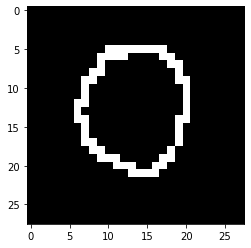

In [ ]:
img5 = image.load_img('Untitled.png', grayscale=True, target_size=(28, 28))
img0 = image.load_img('0.png', grayscale=True, target_size=(28, 28))
img1 = image.load_img('1.png', grayscale=True, target_size=(28, 28))
img2 = image.load_img('2.png', grayscale=True, target_size=(28, 28))
img3 = image.load_img('3.png', grayscale=True, target_size=(28, 28))
img4 = image.load_img('4.png', grayscale=True, target_size=(28, 28))
img9 = image.load_img('9.png', grayscale=True, target_size=(28, 28))
img6 = image.load_img('6.png', grayscale=True, target_size=(28, 28))
img7 = image.load_img('7.png', grayscale=True, target_size=(28, 28))
img8 = image.load_img('8.png', grayscale=True, target_size=(28, 28))
plt.imshow(img0, cmap='gray')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
i = asarray(img0)
i1 = asarray(img1)
i2 = asarray(img2) 
i3 = asarray(img3) 
i4 = asarray(img4)
i5 = asarray(img5)
i6 = asarray(img6)
i7 = asarray(img7)
i8 = asarray(img8) 
i9 = asarray(img9)

print (i)

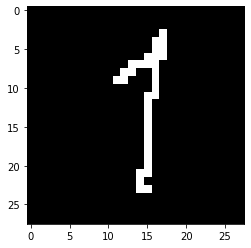

In [ ]:
plt.imshow(img1, cmap='gray')

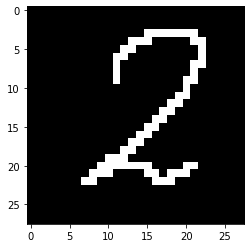

In [ ]:
plt.imshow(img2, cmap='gray')

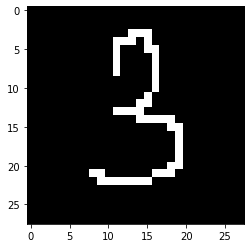

In [ ]:
plt.imshow(img3, cmap='gray')

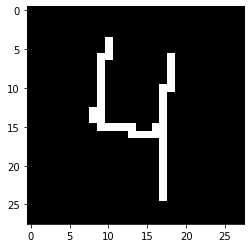

In [ ]:
plt.imshow(img4, cmap='gray')

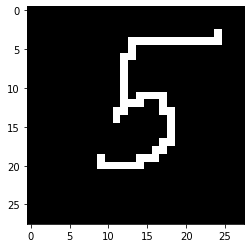

In [ ]:
plt.imshow(img5, cmap='gray')

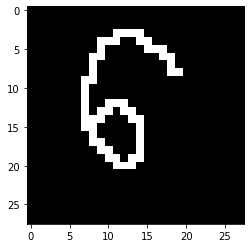

In [ ]:
plt.imshow(img6, cmap='gray')

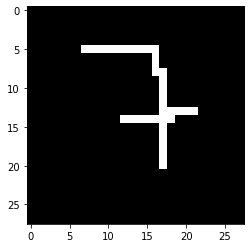

In [ ]:
plt.imshow(img7, cmap='gray')

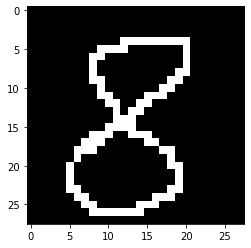

In [ ]:
plt.imshow(img8, cmap='gray')

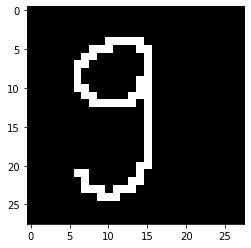

In [ ]:
plt.imshow(img9, cmap='gray')

Делим тренировочный набор на правильный ответ и набор пикселей


In [ ]:
y = train['label']
x = train.drop(labels=['label'], axis=1)

Нормализуем пиксели

In [ ]:
x /= 255.
test /= 255.
i = i / 255.
i1 = i1 / 255.
i2 = i2 / 255.
i3 = i3 / 255.
i4 = i4 / 255.
i5 = i5 / 255.
i6 = i6 / 255.
i7 = i7 / 255.
i8 = i8 / 255.
i9 = i9 / 255.
print (i)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0

In [ ]:
x = x.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)
i = i.reshape(-1, 28, 28, 1)
i1 = i1.reshape(-1, 28, 28, 1)
i2 = i2.reshape(-1, 28, 28, 1)
i3 = i3.reshape(-1, 28, 28, 1)
i4 = i4.reshape(-1, 28, 28, 1)
i5 = i5.reshape(-1, 28, 28, 1)
i6 = i6.reshape(-1, 28, 28, 1)
i7 = i7.reshape(-1, 28, 28, 1)
i8 = i8.reshape(-1, 28, 28, 1)
i9 = i9.reshape(-1, 28, 28, 1)

Разбиваем правильные ответы на категории

In [ ]:
y = to_categorical(y, 10)

Отделяем данные на валидацию

In [ ]:
x_train = x[:37800]
x_val = x[37800:]
y_train = y[:37800]
y_val = y[37800:]

Строим модель

In [ ]:

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu')) #свёрточный слой 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #свёрточный слой 2

model.add(MaxPooling2D(pool_size=(2, 2))) #слой подвыборки

model.add(Dropout(0.25)) #слой регуляризации отключает нейроны с вероятностью в 25% для предотвращения переобучения

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten()) #преобразование из двумерного в одномерный

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) #softmax определяет вероятность появления того или иного класса 

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_37 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 12, 12, 64)        36928     
                                                      

Компилируем модель

In [ ]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy']) # метрика точность, оптимизатор стахостический градиентный спуск, функция ошибки для определения вероятности класса

Обучаем модель

In [ ]:
checkpoint = ModelCheckpoint('weight.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
lrreduction = ReduceLROnPlateau('val_accuracy', 0.5, 3, min_lr=0.00001) #снижение скорости обучения при отсутствии улучшения метрики

In [ ]:
model.fit(x_train, y_train, batch_size=10, epochs=25, verbose=1, validation_data=(x_val, y_val), callbacks=[checkpoint, lrreduction])

Epoch 1/25
3777/3780 [============================>.] - ETA: 0s - loss: 0.4182 - accuracy: 0.8640
Epoch 1: val_accuracy improved from -inf to 0.97286, saving model to weight.h5
3780/3780 [==============================] - 17s 4ms/step - loss: 0.4183 - accuracy: 0.8640 - val_loss: 0.0887 - val_accuracy: 0.9729 - lr: 0.0100
Epoch 2/25
3771/3780 [============================>.] - ETA: 0s - loss: 0.1254 - accuracy: 0.9608
Epoch 2: val_accuracy improved from 0.97286 to 0.97762, saving model to weight.h5
3780/3780 [==============================] - 15s 4ms/step - loss: 0.1253 - accuracy: 0.9609 - val_loss: 0.0612 - val_accuracy: 0.9776 - lr: 0.0100
Epoch 3/25
3775/3780 [============================>.] - ETA: 0s - loss: 0.0892 - accuracy: 0.9731
Epoch 3: val_accuracy improved from 0.97762 to 0.98310, saving model to weight.h5
3780/3780 [==============================] - 16s 4ms/step - loss: 0.0892 - accuracy: 0.9731 - val_loss: 0.0480 - val_accuracy: 0.9831 - lr: 0.0100
Epoch 4/25
3771/3780 [

Загружаем веса

In [ ]:
model.load_weights('weight.h5')

Прогнозирует метки значений данных на основе обученной модели.

In [ ]:
pred = model.predict(i)
pred1 = model.predict(i1)
pred2 = model.predict(i2)
pred3 = model.predict(i3)
pred4 = model.predict(i4)
pred5 = model.predict(i5)
pred6 = model.predict(i6)
pred7 = model.predict(i7)
pred8 = model.predict(i8)
pred9 = model.predict(i9)

1/1 [==============================] - 0s 16ms/step


In [ ]:
print (pred)

pred = np.argmax(pred, axis=1)
print(pred)

[[8.0292422e-01 1.4519311e-07 2.7184418e-04 2.6107806e-05 8.8570360e-04
  6.6312791e-06 2.0921124e-04 2.4252270e-04 6.6027977e-05 1.9536754e-01]]
[0]


In [ ]:
pred1 = np.argmax(pred1, axis=1)
print(pred1)

[1]


In [ ]:
pred2 = np.argmax(pred2, axis=1)
print(pred2)

[2]


In [ ]:
pred3 = np.argmax(pred3, axis=1)
print(pred3)

[3]


In [ ]:
pred4 = np.argmax(pred4, axis=1)
print(pred4)

[4]


In [ ]:
pred5 = np.argmax(pred5, axis=1)
print(pred5)

[5]


In [ ]:
pred6 = np.argmax(pred6, axis=1)
print(pred6)

[6]


In [ ]:
pred7 = np.argmax(pred7, axis=1)
print(pred7)

[7]


In [ ]:
pred8 = np.argmax(pred8, axis=1)
print(pred8)

[8]


In [ ]:
pred9 = np.argmax(pred9, axis=1)
print(pred9)

[9]


Создаём представление

In [ ]:
pred = np.argmax(pred, axis=1)
pred = pd.Series(pred, name='Label')
submission = pd.concat([pd.Series(range(1,28001), name='ImageId'), pred], axis=1)
submission.to_csv('weight.csv', index=False)

# Оцениваем качество обучения модели на тестовых данных

In [ ]:

scores = model.evaluate(x, y, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 99.84%
